# Temporal Difference Learning as part of Reinforcement Learning
**Created by Tom van Knippenberg**

Reinforcement learning is the area within Artificial Intelligence where the computer learns from interactions with an environment. <br>
The code in the repository is created from scratch using pseudocode from the book "Reinforcement Learning" by Phil Winder. 

In this notebook, the results of the these methods are shown on the Grid World example, one of the simpler examples used in Reinforcement Learning. <br>
The notebook discusses three algorithms, namely Q-learning, SARSA learning and n-Step SARSA learning. Each method will be discussed.
At the end of the notebook, the results from changing the rewards in the environments are changed to see what the effect is.

## Environment 
The idea of the environment is that the computer learns to walk around a cliff. The environment looks as follows:
| <pre>  </pre> 	|  <pre>  </pre> 	|   <pre>  </pre>	|   <pre>  </pre>	|   <pre>  </pre>	|
|---	            |---	            |---	            |---	            |---	            |
|  <pre>  </pre> 	|   	            |   	            |   	            |   	            |
| S  	            | C  	            | C   	            | C  	            | F   	            |

The S represents the Start <br>
The C represents the cliff and gets a reward of -100 (falling of a cliff is bad) <br>
The whitespace represents free space and gets a reward of -1 (spending too much time on free space is not good) <br>
The F represents the finish and gets a reward of 50 (Reaching the end point is good)



In [1]:
import numpy as np
import algorithms as alg
import visualize as vis
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.patches as patches

environment = np.array([[-1, -1, -1, -1, -1],
                        [-1, -1, -1, -1, -1],
                        [-1, -1, -1, -1, -1],
                        [-1, -100, -100, -100, 50]
                        ])



## Use of Different Algorithms

### Q Learning
Q-learrning is part of temporal difference learning. Temporal difference learning is a class of model-free reinforcement learning methods. It learns by sampling from the environment and updating current estimates. <br>
Q-learning tries to estimate the action-value function. The algorithm looks one step ahead. This allows the algorithm to select thje best acton.

Q-learning updates with the rule: <br>
Q(s,a) <- Q(s,a) + &alpha; [r + &gamma;  argmax <sub>(a<sub>s</sub> &isin; A(s))  </sub>  Q(s', a<sub>s </sub>) - Q(s, a) ] <br>
Where: <br>
s = current state <br>
s' = next state <br>
a = action<br>
r = reward<br>
&alpha; = learning rate<br>
&gamma; = discounting factor

In [2]:
# Q_dic = defaultdict(alg.def_value)
terminal_states = [(3,1), (3,2), (3,3), (3, 4)]
rewards, Q_sa = alg.Q_Learning(environment,  terminal_states, episodes=1000, alpha=0.9, gamma=0.9, eps=0.1)

100%|██████████| 1000/1000 [00:00<00:00, 4083.84it/s]


Let's now plot the optimal path found according to Q-learning. 

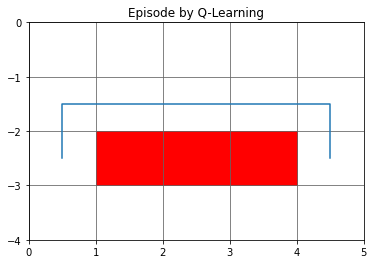

In [3]:
episode = vis.see_trained_model(Q_sa, environment)
vis.plot_path(episode, method = "Q-Learning")

We can see that the agent learned a path that is very close to the cliff in the environment. This is an ideal path to the human eye as it reaches the end goal in the least amount of steps possible. 

### SARSA Learning
Intro to SARSA-learning

SARSA learning is also part of temporal difference learning. Sarsa stands for state, action, reward, state, action and corresponds to the action.
Instead of calculating using the maximal reward to estimate the expected return, SARSA averages all the runs to estimate the expected return. This can also be seen in the update rule.  


SARSA-learning updates with the rule: <br>
Q(s,a) <- Q(s,a) + &alpha; [r + &gamma;  Q(s', a<sub>s </sub>) - Q(s, a) ] <br>
Where: <br>
s = current state <br>
s' = next state <br>
a = action<br>
r = reward<br>
&alpha; = learning rate<br>
&gamma; = discounting factor

In [4]:
rewards_sars, Q_sarsa = alg.SARSA_Learning(environment, terminal_states=[(3,1), (3,2), (3,3), (3, 4)], episodes=1000, alpha=0.9, gamma=0.9, eps=0.1)

100%|██████████| 1000/1000 [00:00<00:00, 1310.70it/s]


Let's plot the path discovered by the SARSA agent. 

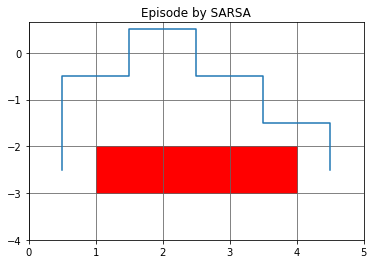

In [5]:
episode_sarsa = vis.episode_SARSA(Q_sarsa, environment)
vis.plot_path(episode_sarsa, "SARSA")

SARSA is also able to find a path to the end goal. However, it takes a more risk-averse route. This is the result of the choice to calculate the expected return over all possible future actions. Comparing, Q-learning selects the best possible reward as a way to estimate the expected return. This is a more optimistic idea. 

### n-Step SARSA Learning
An extension to SARSA learning is n-step SARSA Learning. Instead of looking one action ahead, it looks n actions ahead. This means that it needs more samples to be able to calculate the action-value estimates. However, looking ahead more steps into the future may be beneficial. Take for example the cliff, we may understand which path leads to falling of the cliff. The agent can then adjust its path in time. 

In [6]:
dic = alg.nStep_SARSA_Learning(environment,episodes=1000, alpha=0.1, gamma=0.9, eps=0.1, n=10)

100%|██████████| 1000/1000 [00:00<00:00, 1058.18it/s]


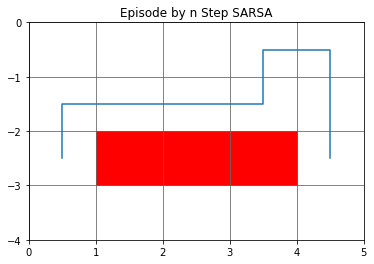

In [7]:
episode_sarsa_nstep = vis.episode_SARSA(dic, environment)
vis.plot_path(episode_sarsa_nstep, "n Step SARSA")

We can see that the resulting path is very similar to the path of Q-learning. 

## Reward Engineering
Reward engineering is argued to be a crucial part in the area of Reinforcement Learning. This section investigates what happens when we use a different environment. <br>

First, we investigate the effect of setting all steps,  but falling of the cliff and ending in the terminal state, to a reward of 0. Q-learning is used without discounting factor. This means that each reward holds for the whole chain of states. 

100%|██████████| 1000/1000 [00:00<00:00, 1326.80it/s]


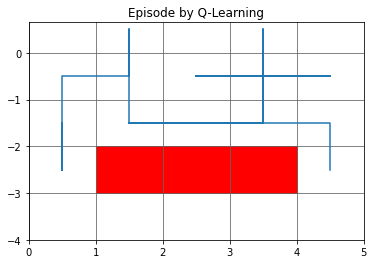

In [10]:
environment = np.array([[-0, -0, -0, -0, -0],
                        [-0, -0, -0, -0, -0],
                        [-0, -0, -0, -0, -0],
                        [-0, -100, -100, -100, 50]
                        ])

terminal_states = [(3,1), (3,2), (3,3), (3, 4)]
rewards, Q_sa = alg.Q_Learning(environment,  terminal_states, episodes=1000, alpha=0.9, gamma=1, eps=0.1)
episode = vis.see_trained_model(Q_sa, environment)
vis.plot_path(episode, method = "Q-Learning")

We can see that the agent did not learn an optimal path. It is just strolling around and eventually ends up in the terminal state. <br>

Now, how can we tackle this? We may apply a discounting factor to promote the shortest path to the end goal. See the result below. The environment did not have an effect on the agent learning an optimal path. 

100%|██████████| 50/50 [00:00<00:00, 1279.25it/s]


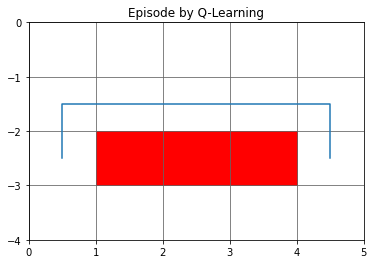

In [9]:
# Apply discounting rewards to speed up the path
rewards, Q_sa = alg.Q_Learning(environment,  terminal_states, episodes=50, alpha=0.9, gamma=0.8, eps=0.1)
episode = vis.see_trained_model(Q_sa, environment)
vis.plot_path(episode, method = "Q-Learning")